In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [2]:
#loading the Lead Score csv file
df = pd.read_csv('Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# shape of the data frame
df.shape

# info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#stastical information of the data frame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Replacing the select with null values for all columns
df = df.replace({'Select':np.nan})

In [6]:
# Removing duplicate rows
records_before = df.shape[0]

df_no_duplicates = df.drop_duplicates()

# Get the number of rows after removing duplicates
records_after = df_no_duplicates.shape[0]

# Calculate the count of records deleted
records_deleted = records_before - records_after

print("Number of duplicate records deleted:", records_deleted)

Number of duplicate records deleted: 0


In [7]:
#Percentage of missing values
null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(df.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


In [8]:
## removing columns greater than 45% null values
null_column =round((df.isnull().sum()/len(df))*100,4) 
null_column_45 = null_column[null_column.values > 45.0000]
null_column_45 = list(null_column_45.index)
print("Columns Dropped ",null_column_45)
df.drop(labels=null_column_45,axis=1,inplace=True)

Columns Dropped  ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [9]:
# Columns contains  data type objects
ob=df.select_dtypes(include=["object"]).columns
ob

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [10]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_result = pd.concat([df_result, df_temp])

    df_result.set_index("columns", inplace=True)
    return df_result

In [11]:
df_cat = Cat_info(df, ob)
df_cat

,values,unique_values
columns,,
Prospect ID,"[7927b2df-8bba-4d29-b9a2-b6e0beafe620, 2a27243...",9240
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21
Do Not Email,"[No, Yes]",2
Do Not Call,"[No, Yes]",2
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38
Specialization,"[nan, Business Administration, Media and Adver...",18
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6


In [12]:
def column_category_counts(data):
    return pd.DataFrame(data.value_counts(dropna=False))


for column in ob:
    print("Column Name : ",column)
    display(column_category_counts(df[column]).T)

Column Name :  Prospect ID


Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,22e9d4ef-d294-4ebf-81c7-7c7a1105aeea,46befc49-253a-419b-abea-2fd978d2e2b1,9d35a2c2-09d8-439f-9875-0e8bbf267f5a,f0de9371-4dc2-48c2-9785-a08d6fc4fcb5,446a290f-b78f-413b-8912-d9c79a847e3a,38826741-ffe2-4d37-89c4-1140c66c5560,f08604ae-a2fa-4d64-8a42-a95ff2bddfed,ce9c2fa0-d2ff-493d-82a9-20c81b175b3e,13e3716d-528a-4e90-a441-51ab1d0184d1,...,5f07da69-0b4f-4caa-a97e-74b80691bf20,9359e5a0-70df-46cf-84ec-ce987f9103f1,76b36b1f-59b4-4a21-8a00-84a8b0db1ada,2e1ff385-d334-420f-a530-8074e95032b2,c2e4f1cd-4a23-42ad-b4f4-88f0c1c1c33f,ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3,644099a2-3da4-4d23-9546-7676340a372b,2a093175-415b-4321-9e69-ed8d9df65a3c,c66249a3-8500-4c66-a511-312d914573de,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Column Name :  Lead Origin


Lead Origin,Landing Page Submission,API,Lead Add Form,Lead Import,Quick Add Form
count,4886,3580,718,55,1


Column Name :  Lead Source


Lead Source,Google,Direct Traffic,Olark Chat,Organic Search,Reference,Welingak Website,Referral Sites,Facebook,NaN,bing,...,Press_Release,Social Media,Live Chat,youtubechannel,testone,Pay per Click Ads,welearnblog_Home,WeLearn,blog,NC_EDM
count,2868,2543,1755,1154,534,142,125,55,36,6,...,2,2,2,1,1,1,1,1,1,1


Column Name :  Do Not Email


Do Not Email,No,Yes
count,8506,734


Column Name :  Do Not Call


Do Not Call,No,Yes
count,9238,2


Column Name :  Last Activity


Last Activity,Email Opened,SMS Sent,Olark Chat Conversation,Page Visited on Website,Converted to Lead,Email Bounced,Email Link Clicked,Form Submitted on Website,NaN,Unreachable,Unsubscribed,Had a Phone Conversation,Approached upfront,View in browser link Clicked,Email Received,Email Marked Spam,Visited Booth in Tradeshow,Resubscribed to emails
count,3437,2745,973,640,428,326,267,116,103,93,61,30,9,6,2,2,1,1


Column Name :  Country


Country,India,NaN,United States,United Arab Emirates,Singapore,Saudi Arabia,United Kingdom,Australia,Qatar,Bahrain,...,Kenya,Sri Lanka,Tanzania,Malaysia,Liberia,Switzerland,Denmark,Russia,Vietnam,Indonesia
count,6492,2461,69,53,24,21,15,13,10,7,...,1,1,1,1,1,1,1,1,1,1


Column Name :  Specialization


Specialization,NaN,Finance Management,Human Resource Management,Marketing Management,Operations Management,Business Administration,IT Projects Management,Supply Chain Management,"Banking, Investment And Insurance",Travel and Tourism,Media and Advertising,International Business,Healthcare Management,Hospitality Management,E-COMMERCE,Retail Management,Rural and Agribusiness,E-Business,Services Excellence
count,3380,976,848,838,503,403,366,349,338,203,203,178,159,114,112,100,73,57,40


Column Name :  What is your current occupation


What is your current occupation,Unemployed,NaN,Working Professional,Student,Other,Housewife,Businessman
count,5600,2690,706,210,16,10,8


Column Name :  What matters most to you in choosing a course


What matters most to you in choosing a course,Better Career Prospects,NaN,Flexibility & Convenience,Other
count,6528,2709,2,1


Column Name :  Search


Search,No,Yes
count,9226,14


Column Name :  Magazine


Magazine,No
count,9240


Column Name :  Newspaper Article


Newspaper Article,No,Yes
count,9238,2


Column Name :  X Education Forums


X Education Forums,No,Yes
count,9239,1


Column Name :  Newspaper


Newspaper,No,Yes
count,9239,1


Column Name :  Digital Advertisement


Digital Advertisement,No,Yes
count,9236,4


Column Name :  Through Recommendations


Through Recommendations,No,Yes
count,9233,7


Column Name :  Receive More Updates About Our Courses


Receive More Updates About Our Courses,No
count,9240


Column Name :  Tags


Tags,NaN,Will revert after reading the email,Ringing,Interested in other courses,Already a student,Closed by Horizzon,switched off,Busy,Lost to EINS,Not doing further education,...,in touch with EINS,Lost to Others,Still Thinking,Want to take admission but has financial problems,In confusion whether part time or DLP,Interested in Next batch,Lateral student,Shall take in the next coming month,University not recognized,Recognition issue (DEC approval)
count,3353,2072,1203,513,465,358,240,186,175,145,...,12,7,6,6,5,5,3,2,2,1


Column Name :  Update me on Supply Chain Content


Update me on Supply Chain Content,No
count,9240


Column Name :  Get updates on DM Content


Get updates on DM Content,No
count,9240


Column Name :  City


City,NaN,Mumbai,Thane & Outskirts,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Tier II Cities
count,3669,3222,752,686,457,380,74


Column Name :  I agree to pay the amount through cheque


I agree to pay the amount through cheque,No
count,9240


Column Name :  A free copy of Mastering The Interview


A free copy of Mastering The Interview,No,Yes
count,6352,2888


Column Name :  Last Notable Activity


Last Notable Activity,Modified,Email Opened,SMS Sent,Page Visited on Website,Olark Chat Conversation,Email Link Clicked,Email Bounced,Unsubscribed,Unreachable,Had a Phone Conversation,Email Marked Spam,Approached upfront,Resubscribed to emails,View in browser link Clicked,Form Submitted on Website,Email Received
count,3407,2827,2172,318,183,173,60,47,32,14,2,1,1,1,1,1


In [13]:
#Dropping columns which are highly skewed
df.drop(["Newspaper Article","Do Not Email","Do Not Call","What matters most to you in choosing a course","Search","Magazine","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [14]:
#Dropping these below columns because these are generated by the sales team after contacting the students.
df.drop(["Tags","Prospect ID","Lead Number","City"],axis=1,inplace=True)

In [15]:
## Dropping Last Notable activity as this field is similar to Last activity
df.drop(["Last Notable Activity"],axis=1,inplace=True)

In [16]:
# Converting values having least frequencies to "OTHERS" for columns Lead source, Last activity , Country
df.loc[(df["Lead Source"].isin(["Facebook","bing","google","Click2call","Social Media","Live Chat","Press_Release","testone","welearnblog_Home","blog","youtubechannel","NC_EDM","Pay per Click Ads","WeLearn"])),"Lead Source"]="Other_Internet_Sources"
df.loc[(df["Last Activity"].isin(["Unreachable","Unsubscribed","Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Marked Spam","Email Received","Resubscribed to emails","Visited Booth in Tradeshow"])),"Last Activity"]="All Others"
df.loc[(df["Country"].isin(["Bahrain","Hong Kong","France","Oman","unknown","Nigeria","South Africa","Canada","Kuwait","Germany","Sweden","Ghana","Italy"                      
,"Belgium","China","Uganda","Asia/Pacific Region","Philippines","Bangladesh","Netherlands","Kenya","Sri Lanka","Indonesia","Denmark","Tanzania","Malaysia","Switzerland","Russia","Liberia","Vietnam"])),"Country"]="All Others"

In [17]:
df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
dtype: int64

In [18]:
# impute the mode for country, city, specialization and what is your current occupation with hightest value counts
df.loc[df['Specialization'].isnull(),'Specialization']=df['Specialization'].value_counts().index[0]
df.loc[df['Country'].isnull(),'Country']=df['Country'].value_counts().index[0]
df.loc[df['What is your current occupation'].isnull(),'What is your current occupation']=df['What is your current occupation'].value_counts().index[0]

In [19]:
## removing the remaining null values 
rows_before = len(df)
df = df.dropna()
rows_after = len(df)
rows_dropped = rows_before - rows_after
print("Number of rows dropped:", rows_dropped)

Number of rows dropped: 166


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Country                                 9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   object 
d

In [21]:
# object data types columns
ob=df.select_dtypes(include=["object"]).columns




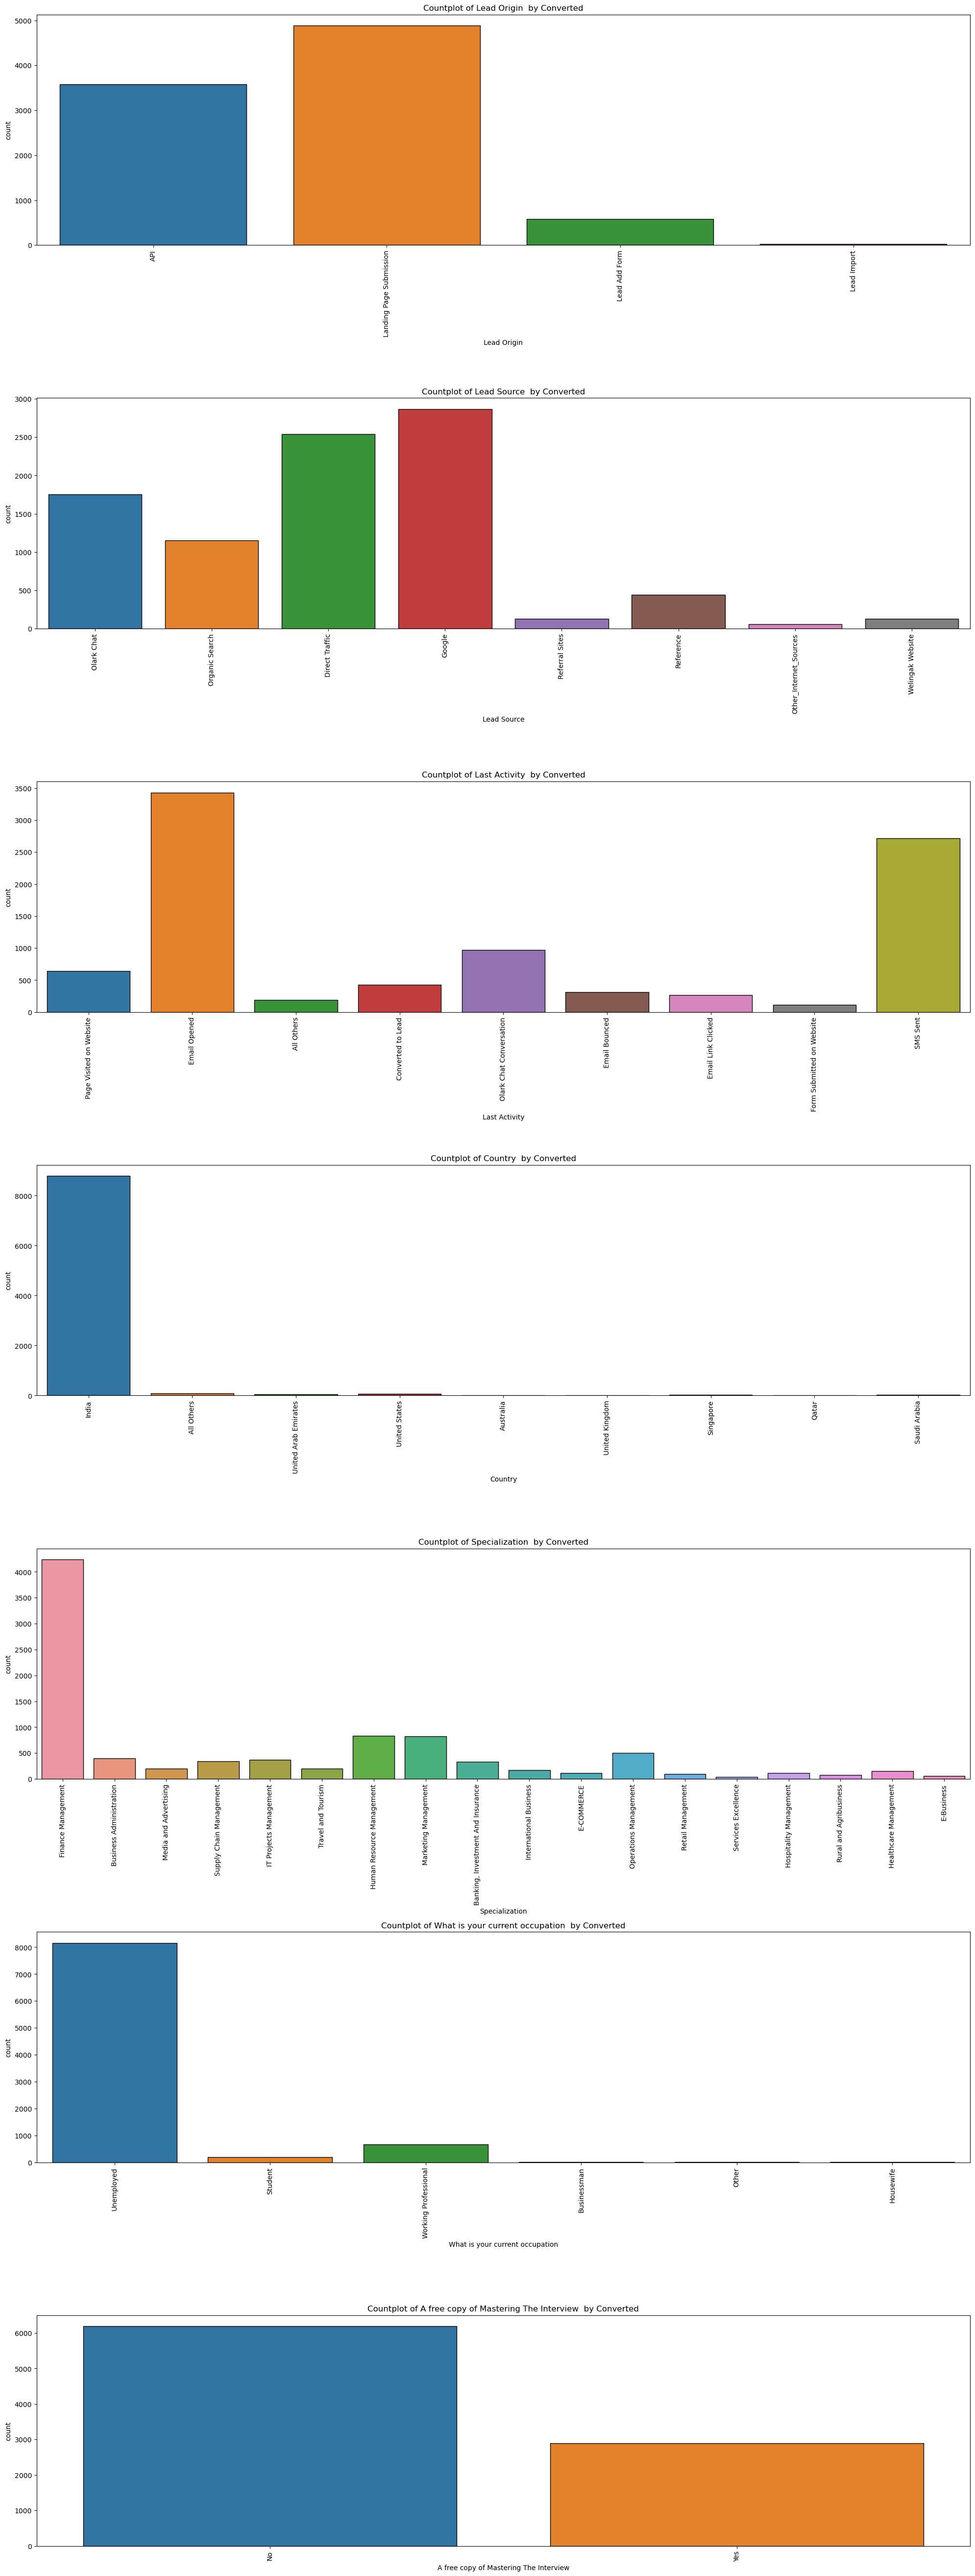

In [22]:
plt.figure(figsize=(20,60))
for i,cat_fea in enumerate(ob):
    plt.subplot(8,1,i+1)
    sns.countplot(x=cat_fea,data=df,edgecolor="black")
    plt.xticks(rotation='vertical')
    plt.subplots_adjust(hspace=1.5) 
    plt.title("Countplot of {}  by Converted".format(cat_fea))
plt.tight_layout()    
plt.show()

In [23]:
## checking integer and float datatypes
nu=df.select_dtypes(include=["int","float"]).columns
nu

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


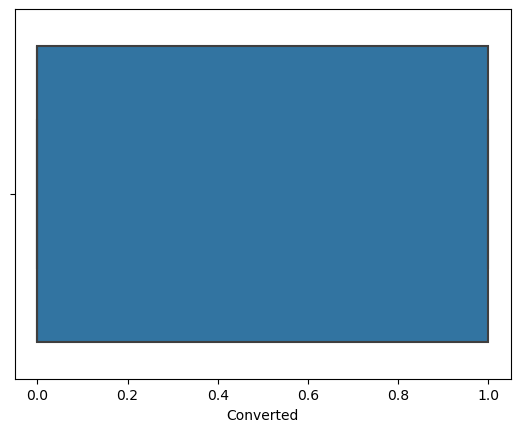

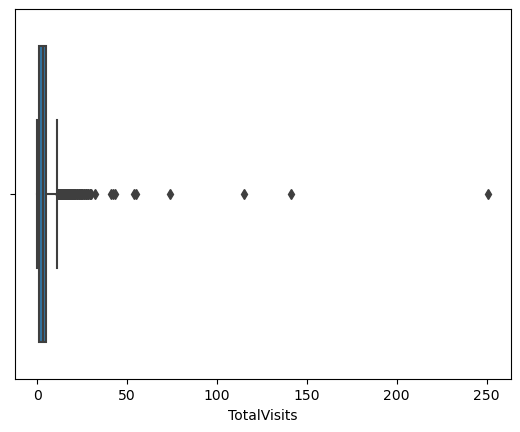

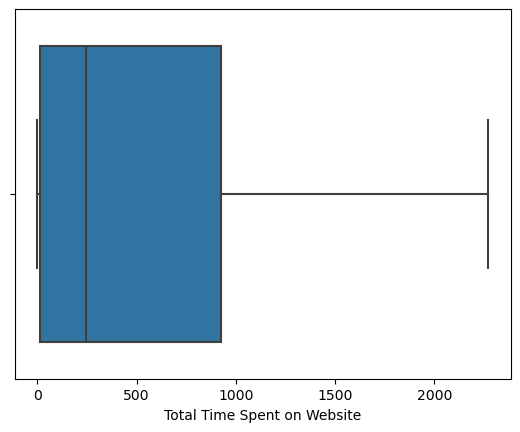

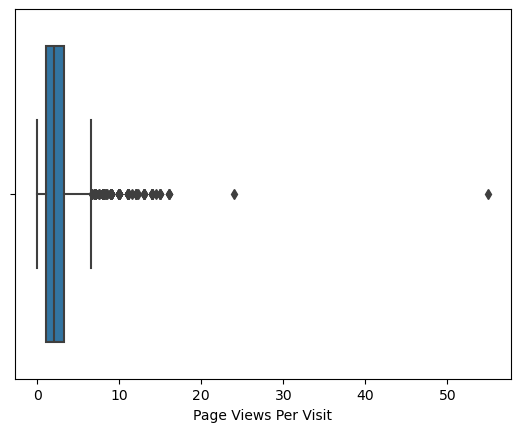

In [24]:
for c in df[nu]:
    plt.figure()
    sns.boxplot(x = c, data= df, orient = "v")

In [25]:
temp = 1.5

for column in nu:
    print("Column:", column)
    
    # Calculate upper and lower quartiles
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate upper and lower limits
    upper_limit = Q3 + (temp * IQR)
    lower_limit = Q1 - (temp * IQR)
    
    print("Upper Limit:", upper_limit, "Lower Limit:", lower_limit)
    
    # Identify outliers
    outliers_upper = df[df[column] > upper_limit]
    outliers_lower = df[df[column] < lower_limit]
    
    # Calculate number of outliers filtered
    num_outliers_filtered = outliers_upper.shape[0] + outliers_lower.shape[0]
    proportion_outliers_filtered = num_outliers_filtered / df.shape[0] * 100
    
    print("Number of outliers above upper limit:", outliers_upper.shape[0])
    print("Number of outliers below lower limit:", outliers_lower.shape[0])
    
    # Replace outliers with upper and lower limits
    df.loc[df[column] > upper_limit, column] = upper_limit
    df.loc[df[column] < lower_limit, column] = lower_limit
    
    print("After replacing outliers:")
    print("Number of values above upper limit:", df[df[column] > upper_limit].shape[0])
    print("Number of values below lower limit:", df[df[column] < lower_limit].shape[0])
    
    print("Number of outliers filtered:", num_outliers_filtered)
    print("Proportion of outliers filtered (%):", proportion_outliers_filtered)
    print("--------------------------------------")

Column: Converted
Upper Limit: 2.5 Lower Limit: -1.5
Number of outliers above upper limit: 0
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered: 0
Proportion of outliers filtered (%): 0.0
--------------------------------------
Column: TotalVisits
Upper Limit: 15.0 Lower Limit: -9.0
Number of outliers above upper limit: 120
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered: 120
Proportion of outliers filtered (%): 1.3224597751818383
--------------------------------------
Column: Total Time Spent on Website
Upper Limit: 3065.0 Lower Limit: -1839.0
Number of outliers above upper limit: 0
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered

C:\Users\User\AppData\Local\Temp\ipykernel_13380\2509546999.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] > upper_limit, column] = upper_limit


In [26]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0.0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,No
1,API,Organic Search,0.0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,No
2,Landing Page Submission,Direct Traffic,1.0,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,0.0,1.0,305,1.0,All Others,India,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,1.0,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,No


In [27]:
#dummy vaiables/one-hot encoding
df = pd.get_dummies(df,drop_first=True)

## checking the shape after adding the dummy variables
df.shape

(9074, 53)

In [28]:
## checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   float64
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   bool   
 5   Lead Origin_Lead Add Form                             9074 non-null   bool   
 6   Lead Origin_Lead Import                               9074 non-null   bool   
 7   Lead Source_Google                                    9074 non-null   bool   
 8   Lead Source_Olark Chat                                9074 non-

In [29]:
# Define categorical columns
ob=df.select_dtypes(include=["object","bool"]).columns

# Apply label encoding
label_encoder = LabelEncoder()
for col in ob:
    df[col] = label_encoder.fit_transform(df[col])


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   float64
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   int64  
 5   Lead Origin_Lead Add Form                             9074 non-null   int64  
 6   Lead Origin_Lead Import                               9074 non-null   int64  
 7   Lead Source_Google                                    9074 non-null   int64  
 8   Lead Source_Olark Chat                                9074 non-

In [31]:
file_path = "LeadScoreCleaned.csv"

# Save the DataFrame to a CSV file
#df.to_csv(file_path, index=False)

In [32]:
#Splitting the dataset into train and test

X = df.drop(columns=['Converted'],axis=1)

#Putting the response variable in y
y = df['Converted']

In [33]:
df['Converted'].value_counts()/df.shape[0]

Converted
0.0    0.621446
1.0    0.378554
Name: count, dtype: float64

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform()

In [35]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train, y_train = ros.fit_resample(X_train, y_train)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(7954, 52) (2723, 52)
(7954,) (2723,)


In [36]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of Random Forest:", accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Testing Accuracy of Random Forest: 0.8060962174072714


In [37]:
# Define the best hyperparameters
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Create a Random Forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(**best_params)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of Random Forest with best hyperparameters:", accuracy)

Testing Accuracy of Random Forest with best hyperparameters: 0.8071979434447301


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final KNN model with the best hyperparameters
final_knn_model = KNeighborsClassifier(**best_params)
final_knn_model.fit(X_train, y_train)

# Evaluate the final KNN model on the test data
final_accuracy = final_knn_model.score(X_test, y_test)
print("Final Testing Accuracy of KNN:", final_accuracy)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Final Testing Accuracy of KNN: 0.744399559309585


In [44]:
# Load the data and split into train and test sets
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Define the best hyperparameters
best_params = {'n_neighbors': 1}

# Create a kNN classifier with the best hyperparameters
knn_model = KNeighborsClassifier(**best_params)

# Fit the model to the scaled training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of kNN with best hyperparameters:", accuracy)

Testing Accuracy of kNN with best hyperparameters: 0.744399559309585
